# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Generating the API calls
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

humidity=[]
lat=[]
long=[]
country=[]
max_temp=[]
wind_speed=[]
date=[]
cloudiness =[]
city_name  = []

# Setting initial variables for counting the iterations
my_count = 0

for city in cities:
    query_url = url + "q=" + city + "&units=" + units + "&appid=" + weather_api_key
    response = requests.get(query_url)
    response_json = response.json()
    
    try:
        humidity.append(response_json['main']['humidity'])
        lat.append(response_json['coord']['lat'])
        long.append(response_json['coord']['lon'])
        country.append(response_json['sys']['country'])
        max_temp.append(response_json['main']['temp_max'])
        wind_speed.append(response_json['wind']['speed'])
        date.append(response_json['dt']) 
        cloudiness.append(response_json['clouds']['all'])
        city_name.append(response_json['name'])
                        
        print(f"Processing Record {my_count} | {city}")
        my_count+=1
        
    except:
        print("This city was not found. Moving on...")
        pass

This city was not found. Moving on...
Processing Record 0 | adrar
Processing Record 1 | natal
Processing Record 2 | alofi
Processing Record 3 | tongliao
Processing Record 4 | ushuaia
Processing Record 5 | carnarvon
Processing Record 6 | barrow
Processing Record 7 | rikitea
Processing Record 8 | bethel
Processing Record 9 | bima
Processing Record 10 | ribeira grande
This city was not found. Moving on...
Processing Record 11 | abu kamal
This city was not found. Moving on...
Processing Record 12 | hobart
Processing Record 13 | alihe
Processing Record 14 | cabo san lucas
This city was not found. Moving on...
This city was not found. Moving on...
Processing Record 15 | komsomolskiy
Processing Record 16 | klyuchi
Processing Record 17 | khatanga
This city was not found. Moving on...
Processing Record 18 | victoria
Processing Record 19 | torbay
Processing Record 20 | ketchikan
This city was not found. Moving on...
Processing Record 21 | tasiilaq
Processing Record 22 | lavrentiya
Processing Rec

Processing Record 225 | partizanskoye
This city was not found. Moving on...
Processing Record 226 | eyl
Processing Record 227 | mar del plata
Processing Record 228 | yatou
Processing Record 229 | dikson
Processing Record 230 | seoul
This city was not found. Moving on...
Processing Record 231 | arraial do cabo
Processing Record 232 | bac lieu
Processing Record 233 | biloela
Processing Record 234 | port blair
Processing Record 235 | loandjili
Processing Record 236 | vanimo
Processing Record 237 | lang suan
Processing Record 238 | puerto madryn
Processing Record 239 | geraldton
Processing Record 240 | pevek
Processing Record 241 | yarada
Processing Record 242 | praia
Processing Record 243 | surin
Processing Record 244 | mareeba
Processing Record 245 | bose
Processing Record 246 | beringovskiy
Processing Record 247 | vardo
Processing Record 248 | zabaykalsk
Processing Record 249 | wenatchee
Processing Record 250 | gaomi
Processing Record 251 | balangir
Processing Record 252 | baculin
Proce

Processing Record 450 | carutapera
Processing Record 451 | ahipara
Processing Record 452 | guarapari
Processing Record 453 | mujiayingzi
Processing Record 454 | simpang
Processing Record 455 | jeremie
Processing Record 456 | santa barbara
Processing Record 457 | basudebpur
Processing Record 458 | sao miguel do araguaia
Processing Record 459 | ravenna
Processing Record 460 | araguari
Processing Record 461 | kinsale
Processing Record 462 | khani
Processing Record 463 | egvekinot
Processing Record 464 | spirit river
Processing Record 465 | fiumicino
Processing Record 466 | ohara
Processing Record 467 | gorontalo
This city was not found. Moving on...
Processing Record 468 | saint-pierre
Processing Record 469 | mehamn
Processing Record 470 | del rio
Processing Record 471 | gunjur
Processing Record 472 | kloulklubed
Processing Record 473 | griffith
Processing Record 474 | straumen
Processing Record 475 | neya
This city was not found. Moving on...
Processing Record 476 | olafsvik
Processing R

In [7]:
len(city_name)

550

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
city_weather_df=pd.DataFrame({"City":city_name,
                  "Cloudiness":cloudiness,
                  "Country":country,
                  "Date":date,
                  "Humidity":humidity,
                  "Lat":lat,
                  "Long":long,
                  "Max Temp":max_temp,
                  "Wind Speed":wind_speed})

city_weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,Adrar,0,MR,1585361269,27,20.50,-10.07,66.63,8.32
1,Natal,20,BR,1585361269,88,-5.79,-35.21,78.80,2.24
2,Alofi,74,NU,1585361270,66,-19.06,-169.92,84.20,12.75
3,Tongliao,0,CN,1585361270,38,43.61,122.27,43.20,11.54
4,Ushuaia,40,AR,1585361058,65,-54.80,-68.30,44.60,16.11
...,...,...,...,...,...,...,...,...,...
545,Callaway,40,US,1585361317,83,30.15,-85.57,75.20,11.41
546,Don Benito,0,ES,1585361317,79,38.96,-5.86,42.01,10.00
547,Fatwa,75,IN,1585361317,88,25.52,85.32,71.60,6.93
548,Pascagoula,1,US,1585361253,83,30.37,-88.56,77.00,4.70


In [12]:
# Saving the data to a csv file
city_weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

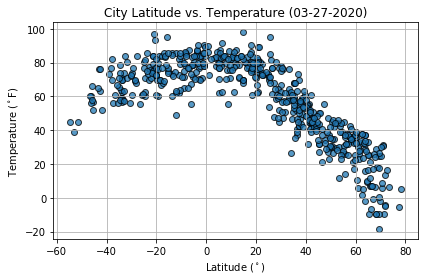

In [16]:
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Temperature ($^\circ$F)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("temp.png")
plt.show()

#### Latitude vs. Humidity Plot

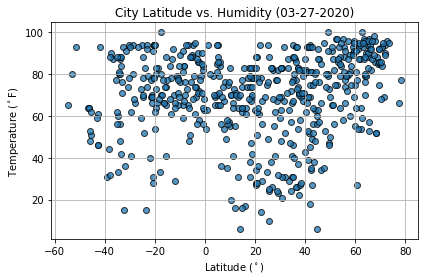

In [17]:
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Temperature ($^\circ$F)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

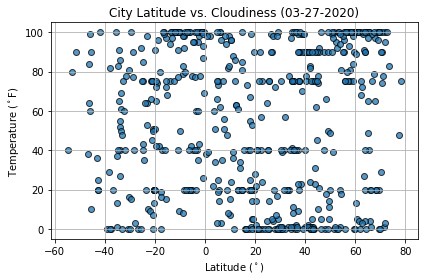

In [21]:
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Temperature ($^\circ$F)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

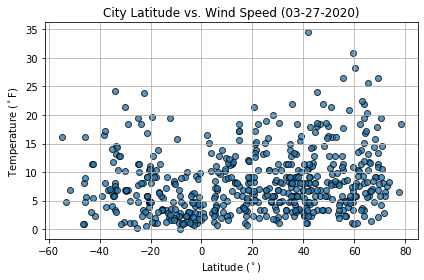

In [23]:
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Temperature ($^\circ$F)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("Wind Speed.png")
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [27]:
# Create Northern and Southern Hemisphere DataFrames
city_weather_df

# Creating the Northern Hemisphere DataFrame
northern_hemisphere_df = city_weather_df[city_weather_df['Lat']>=0]

#Creating the Southern Hemisphere DataFrame
southern_hemisphere_df = city_weather_df[city_weather_df['Lat']<0]

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
1,Natal,20,BR,1585361269,88,-5.79,-35.21,78.80,2.24
2,Alofi,74,NU,1585361270,66,-19.06,-169.92,84.20,12.75
4,Ushuaia,40,AR,1585361058,65,-54.80,-68.30,44.60,16.11
5,Carnarvon,75,AU,1585361272,69,-24.87,113.63,80.60,19.46
7,Rikitea,98,PF,1585361274,74,-23.12,-134.97,77.65,8.14
...,...,...,...,...,...,...,...,...,...
538,Micheweni,95,TZ,1585361317,68,-4.97,39.83,83.88,3.04
539,Buala,80,SB,1585361317,76,-8.14,159.59,84.22,9.01
540,Chissamba,100,AO,1585361317,64,-12.17,17.33,63.21,2.53
543,Kundiawa,100,PG,1585361317,51,-6.02,144.97,67.50,2.30


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

rvalue    = -0.91
r-squared = 0.828


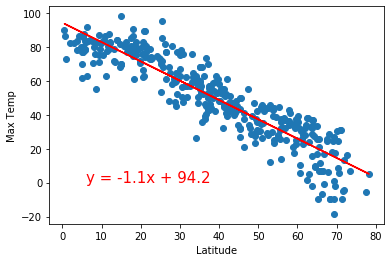

In [34]:
# Temperature versus Latitude Linear Regression
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

# Plotting the regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6, 0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Max Temp")

print(f"rvalue    = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

rvalue    = 0.577
r-squared = 0.333


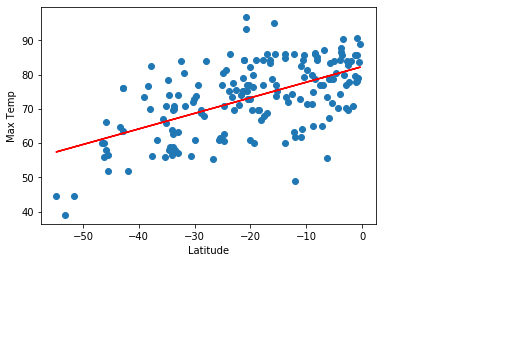

In [35]:
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

# Plotting the regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6, 0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Max Temp Southern Hemisphere")

print(f"rvalue    = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

rvalue    = 0.342
r-squared = 0.117


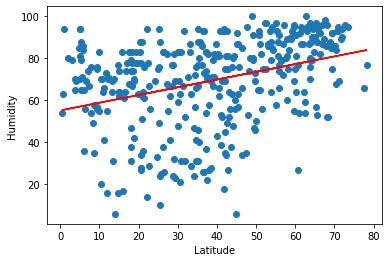

In [38]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

# Plotting the regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq2,(6, 0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Humidity Northern Hemisphere")

print(f"rvalue    = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


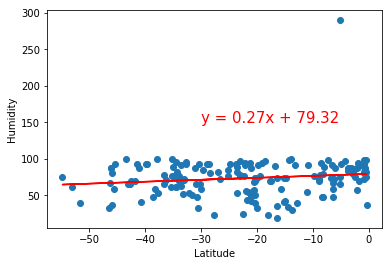

In [112]:
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

# Plotting the regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq2,(6, 0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Humidity Southern Hemisphere")

print(f"rvalue    = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

rvalue    = 0.219
r-squared = 0.048


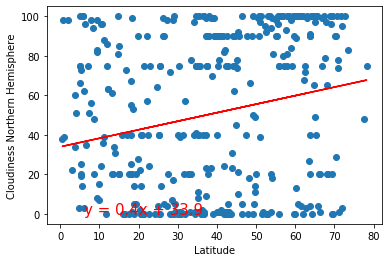

In [40]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

# Plotting the regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq2,(6, 0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness Northern Hemisphere")

print(f"rvalue    = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

rvalue    = 0.275
r-squared = 0.076


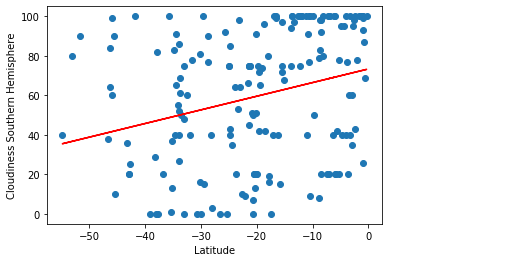

In [41]:
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

# Plotting the regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq2,(6, 0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness Southern Hemisphere")

print(f"rvalue    = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

rvalue    = 0.163
r-squared = 0.026


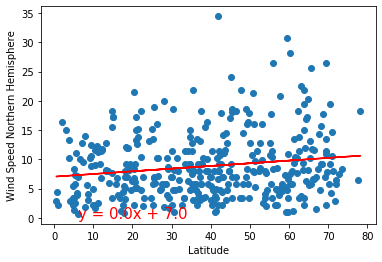

In [42]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

# Plotting the regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq2,(6, 0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed Northern Hemisphere")

print(f"rvalue    = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

rvalue    = -0.327
r-squared = 0.107


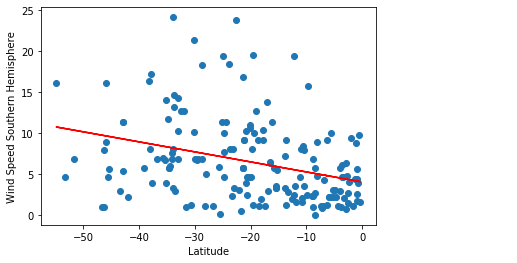

In [43]:
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq2 = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

# Plotting the regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq2,(6, 0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed Southern Hemisphere")

print(f"rvalue    = {round(rvalue, 3)}")
print(f"r-squared = {round(rvalue**2, 3)}")

plt.show()